<a href="https://colab.research.google.com/github/parth0624/Global-Terrorism-Dataset-EDA/blob/main/Global_Terrorism_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import csv
import missingno as msno

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [4]:
working_dir_path= "/content/drive/MyDrive/Project/globalterrorismdb_0718dist.csv"
df=pd.read_csv(working_dir_path,  encoding='latin1')


### Dataset First View

In [5]:
df.head()

,iyear,country,country_txt,region,region_txt,city,vicinity,crit1,crit2,crit3,...,gname,individual,weaptype1,weaptype1_txt,nkill,nwound,property,ishostkid,INT_MISC,INT_ANY
0,1970,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,0,1,1,1,...,MANO-D,0,13,Unknown,1.0,0.0,0,0.0,0,0
1,1970,130,Mexico,1,North America,Mexico city,0,1,1,1,...,23rd of September Communist League,0,13,Unknown,0.0,0.0,0,1.0,1,1
2,1970,160,Philippines,5,Southeast Asia,Unknown,0,1,1,1,...,Unknown,0,13,Unknown,1.0,0.0,0,0.0,1,1
3,1970,78,Greece,8,Western Europe,Athens,0,1,1,1,...,Unknown,0,6,Explosives,NaN,NaN,1,0.0,1,1
4,1970,101,Japan,4,NaN,Fukouka,0,1,1,1,...,Unknown,0,8,Incendiary,NaN,NaN,1,0.0,1,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(df.shape)


(181691, 30)


### Dataset Information

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   country          181691 non-null  int64  
 2   country_txt      181691 non-null  object 
 3   region           181691 non-null  int64  
 4   region_txt       181690 non-null  object 
 5   city             181257 non-null  object 
 6   vicinity         181691 non-null  int64  
 7   crit1            181691 non-null  int64  
 8   crit2            181691 non-null  int64  
 9   crit3            181691 non-null  int64  
 10  multiple         181690 non-null  float64
 11  success          181691 non-null  int64  
 12  suicide          181691 non-null  int64  
 13  attacktype1      181691 non-null  int64  
 14  attacktype1_txt  181691 non-null  object 
 15  targtype1        181691 non-null  int64  
 16  targtype1_txt    181691 non-null  obje

<Axes: >

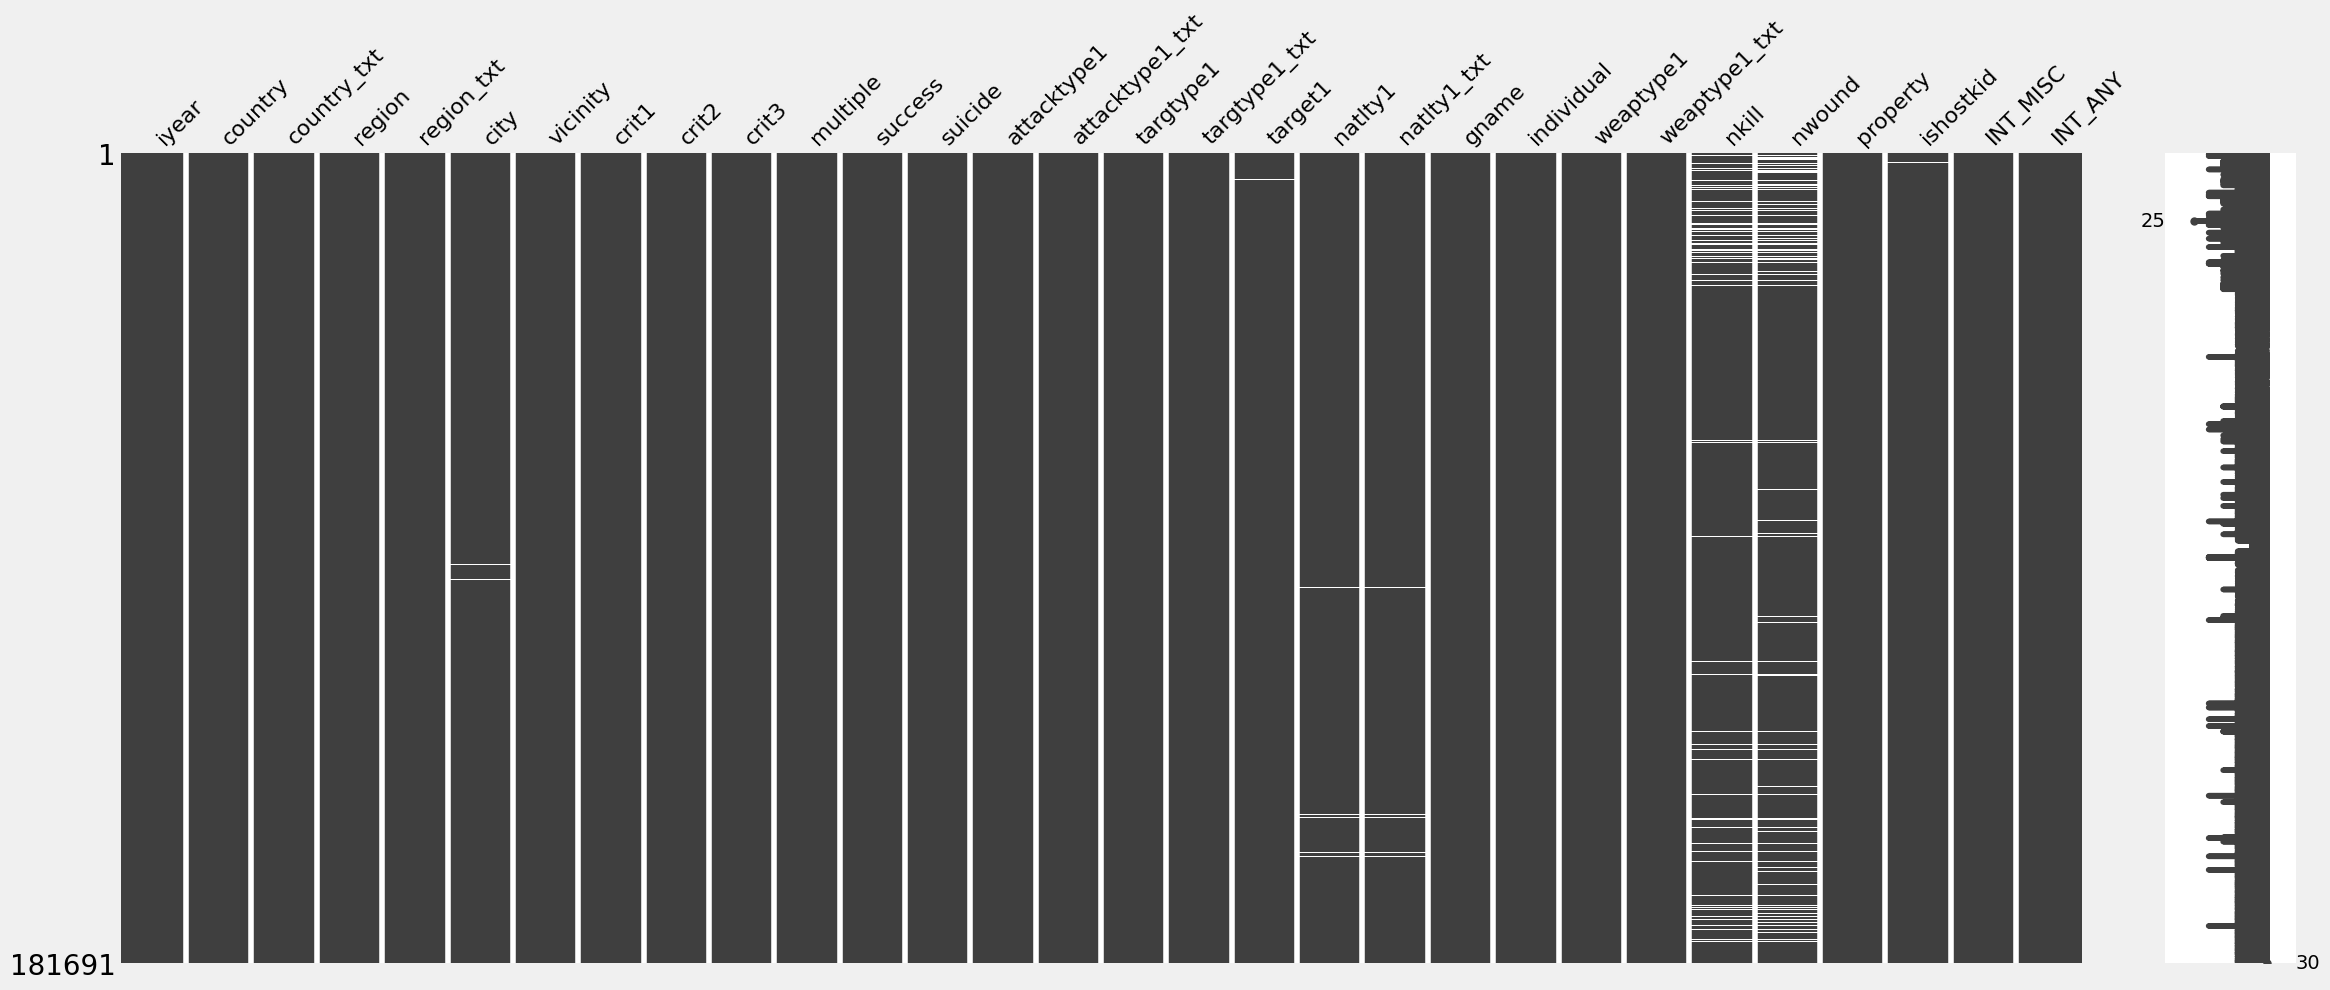

In [ ]:
msno.matrix(df)

# Data Cleaning


In [6]:
# Outlier detection and removal using IQR
# IQR
Q1 = np.percentile(df['nkill'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['nkill'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['nkill'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['nkill'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df['nkill'].shape)

Old Shape:  (181691, 30)
New Shape:  (181691,)


<ipython-input-6-6a34125b084e>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['nkill'], 25,
<ipython-input-6-6a34125b084e>:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['nkill'], 75,


In [7]:
# Dataset Duplicate Value Count
# Checking for Number of duplicate rows
duplicate_Rows = df[df.duplicated()].shape
print("No. of duplicate Entries",duplicate_Rows[0])

# Dropping duplicates
df.drop_duplicates(inplace=True)
duplicate_Rows = df[df.duplicated()].shape
print("No. of duplicate Entries after removing are", duplicate_Rows[0])

No. of duplicate Entries 14188
No. of duplicate Entries after removing are 0


# Handling missing values

In [8]:
#Replacing encoded unknown values with NaN and visualising that
df = df.replace({
"property":-9, "INT_LOG":-9, "INT_MISC":-9, "INT_IDEO":-9, "INT_NE":-9,
"attacktype1":9, "targtype1":20,"weaptype1":13,
"crit1":0,"crit2":0,"crit3":0,
"doubtterr":1,"ishostkid":-9,
"attacktype1_txt" : 'Unknown',
"targtype1_txt" : 'Unknown',
"weaptype1_txt" : 'Unknown',
"country":'Unknown',
"region" : 'Unknown',
"gname":'Unknown',
},np.NaN)

In [9]:
#Checking the count and percentage of missing values in all columns
nmiss = df.isna().sum().sort_values(ascending = False)
missing_percentages = (df.isna().sum().sort_values(ascending = False)/len(df))*100

data = {'Count':nmiss,'Percentage':missing_percentages}
columns = df.columns

miss_df = pd.DataFrame(data, columns)
miss_df.sort_values(['Percentage'], ascending=False)

,Count,Percentage
gname,76524,45.685152
crit3,21775,12.999767
property,19864,11.858892
nwound,14969,8.936556
weaptype1,14327,8.553280
weaptype1_txt,14327,8.553280
nkill,9206,5.496021
attacktype1_txt,6831,4.078136
attacktype1,6831,4.078136
targtype1_txt,4285,2.558163


In [10]:
#For columns with numerical and float values,filling it with 0

columns_to_replace = ['crit3', 'property','nwound','weaptype1','nkill','targtype1','crit1','natlty1','crit2','ishostkid','ishostkid','attacktype1','INT_MISC']

for column in columns_to_replace:
    df[column].fillna(0, inplace=True)

In [11]:
# Dropping rows containing null values
df.dropna(subset=['gname','weaptype1_txt','attacktype1_txt','natlty1_txt','target1','city','targtype1_txt'], inplace=True)

In [12]:
# Define the new data types for the columns
new_data_types = {
    'crit1' : float, 'crit2' : float, 'crit3': float,'targtype1': float,'property': float,
    'natlty1': int,'attacktype1': int,'weaptype1': int,'INT_MISC': int,
}
# Change the data types of the columns
df = df.astype(new_data_types)

# Check the data types after the conversion
print(df.dtypes)

iyear                int64
country              int64
country_txt         object
region               int64
region_txt          object
city                object
vicinity             int64
crit1              float64
crit2              float64
crit3              float64
multiple           float64
success              int64
suicide              int64
attacktype1          int64
attacktype1_txt     object
targtype1          float64
targtype1_txt       object
target1             object
natlty1              int64
natlty1_txt         object
gname               object
individual           int64
weaptype1            int64
weaptype1_txt       object
nkill              float64
nwound             float64
property           float64
ishostkid          float64
INT_MISC             int64
INT_ANY              int64
dtype: object


In [13]:
# Finding correlated variables
correlations = df.corr().unstack().sort_values(ascending=False) # Build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Label it
correlations.query("col1 == 'nkill' & col2 != 'v2'") # Filter by variable

<ipython-input-13-997f0ca414d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr().unstack().sort_values(ascending=False) # Build correlation matrix


,col1,col2,correlation
13,nkill,nkill,1.000000
26,nkill,nwound,0.478229
55,nkill,suicide,0.142637
115,nkill,region,0.048999
117,nkill,iyear,0.046431
126,nkill,success,0.043022
133,nkill,ishostkid,0.032042
151,nkill,property,0.024849
153,nkill,targtype1,0.024337
164,nkill,INT_ANY,0.020044


In [14]:
# imputing numerical variable 'nkill'
df['nkill'].fillna(df['nkill'].std(axis = 0, skipna = True), inplace=True)
df['nwound'].fillna(df['nwound'].std(axis = 0, skipna = True), inplace=True)

# checking correlation for verification
df['nkill'].corr(df['nwound'])

0.47822938705768286

## Region-wise Analysis

In [15]:
print('Country with Highest Terrorist Attacks:',df['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['region_txt'].value_counts().index[0])
print('Most prominent type of attack:',df['attacktype1_txt'].value_counts().index[0])
print('Most prominent target:',df['targtype1_txt'].value_counts().index[0])

Country with Highest Terrorist Attacks: India
Regions with Highest Terrorist Attacks: South Asia
Most prominent type of attack: Bombing/Explosion
Most prominent target: Private Citizens & Property


In [16]:
# Exploring the highest attacked region in the world
max_region = df[df['region_txt']=='Middle East & North Africa']
print('Top 5 gangs in the region:')
print(max_region['gname'].value_counts()[:5])
print(" ")
print('Top 5 countries attacked within the region:')
print(max_region['country_txt'].value_counts()[:5])
print(" ")
print('Top 5 attack types in the region:')
print(max_region['attacktype1_txt'].value_counts()[:5])

Top 5 gangs in the region:
Islamic State of Iraq and the Levant (ISIL)    3752
Kurdistan Workers' Party (PKK)                 1794
Palestinians                                   1033
Al-Qaida in the Arabian Peninsula (AQAP)        865
Houthi extremists (Ansar Allah)                 650
Name: gname, dtype: int64
 
Top 5 countries attacked within the region:
Iraq                        4302
Turkey                      2413
Yemen                       1660
West Bank and Gaza Strip    1383
Algeria                     1346
Name: country_txt, dtype: int64
 
Top 5 attack types in the region:
Bombing/Explosion                 9357
Armed Assault                     4145
Assassination                     1575
Hostage Taking (Kidnapping)        828
Facility/Infrastructure Attack     428
Name: attacktype1_txt, dtype: int64


In [17]:
# terrorist activities over the decades
def get_decade(year):
    period_start = int(year/10)*10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['iyear'].apply(get_decade)

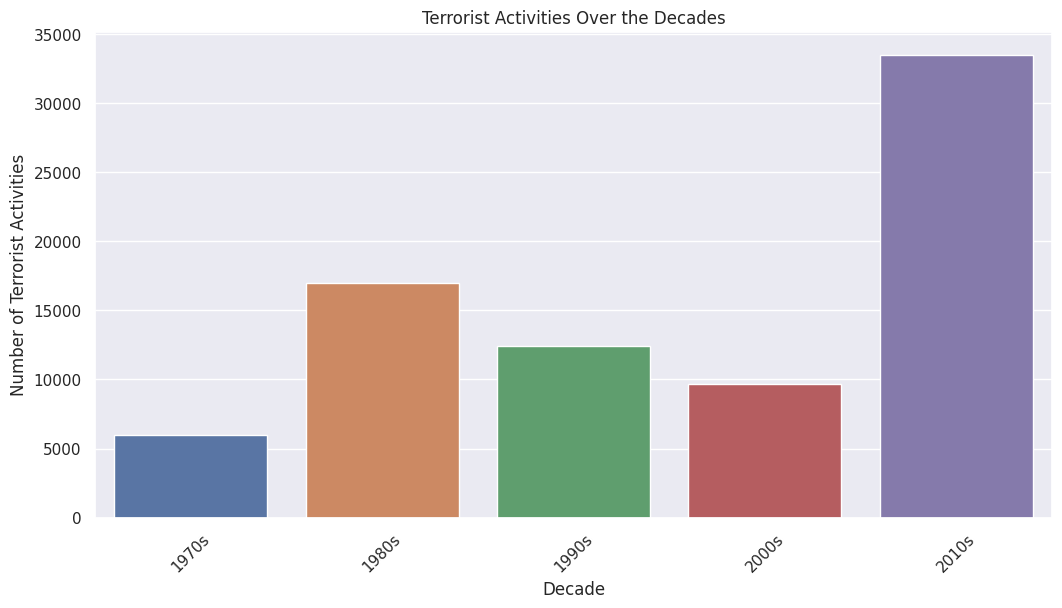

In [18]:
# Convert 'decade' to a categorical data type
df['decade'] = pd.Categorical(df['decade'])

sns.set(rc={'figure.figsize': (11, 6)})
sns.countplot(data=df, x='decade')

plt.xlabel('Decade')
plt.ylabel('Number of Terrorist Activities')
plt.title('Terrorist Activities Over the Decades')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

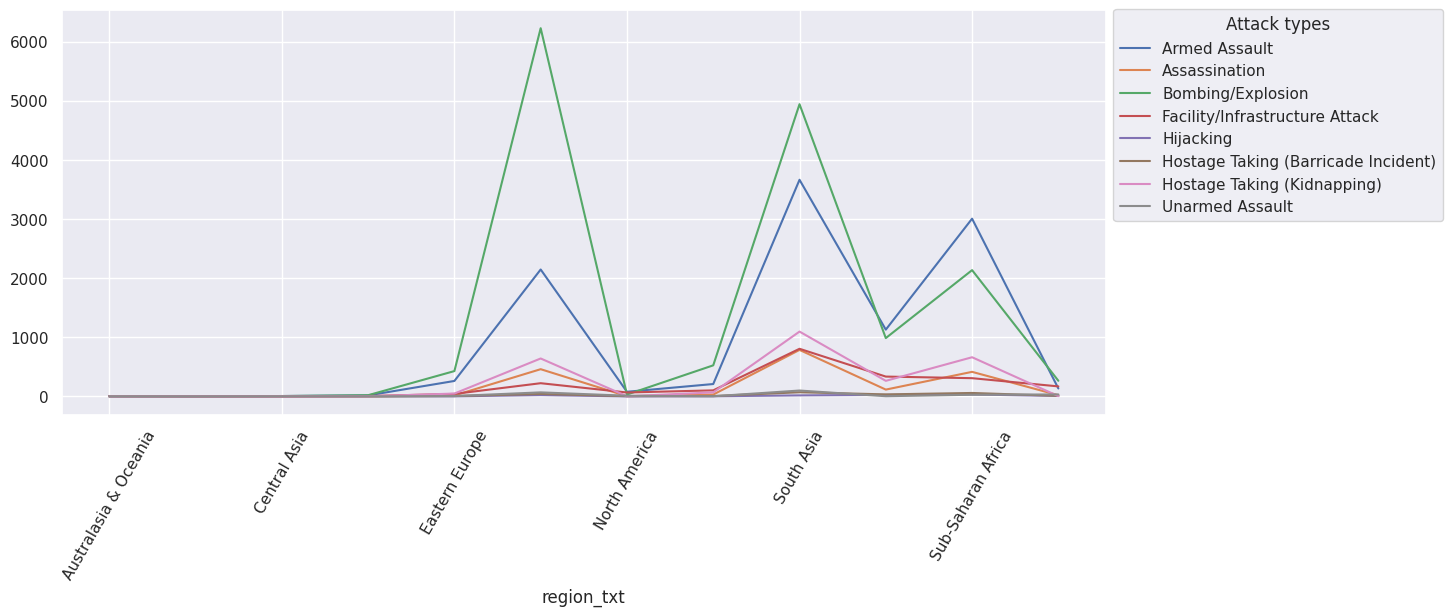

In [19]:
# Count of different types of attack types that occurred in all the regions beyon 2010
yr = df[df['iyear'] >= 2010]
reg_atype = pd.crosstab(yr.region_txt, yr.attacktype1_txt)
reg_atype.head()

pl = reg_atype.plot(kind="line", stacked=False, rot=0)

plt.xticks(rotation=60)
fig=plt.gcf()
fig.set_size_inches(12,5)

pl.legend(title='Attack types', bbox_to_anchor=(1, 1.02), loc='upper left')

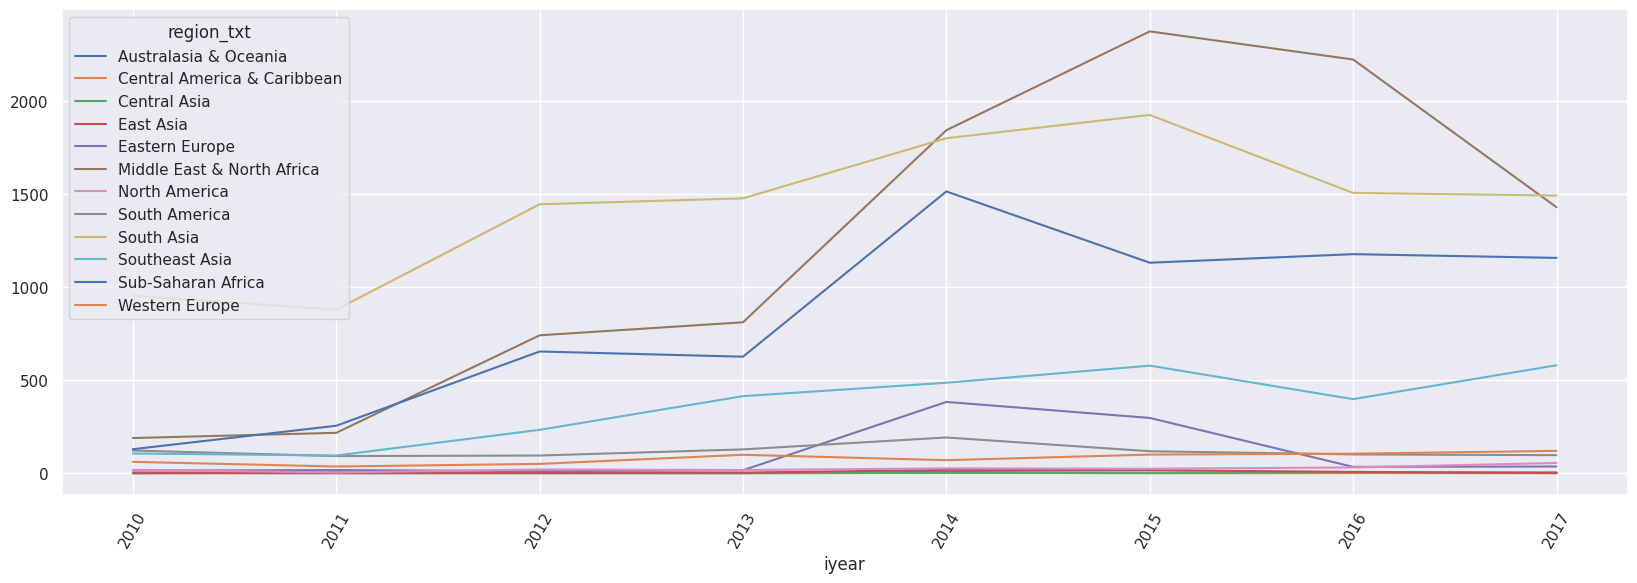

In [20]:
# Was there any property damage due to different attack types?
pdmg = pd.crosstab( yr.iyear,yr.region_txt)
# pdmg.head()
pl = pdmg.plot(kind="line", stacked=False, rot=0)

plt.xticks(rotation=60)

fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()
pl.legend(title='Property Damage', bbox_to_anchor=(1, 1.02), loc='upper left')

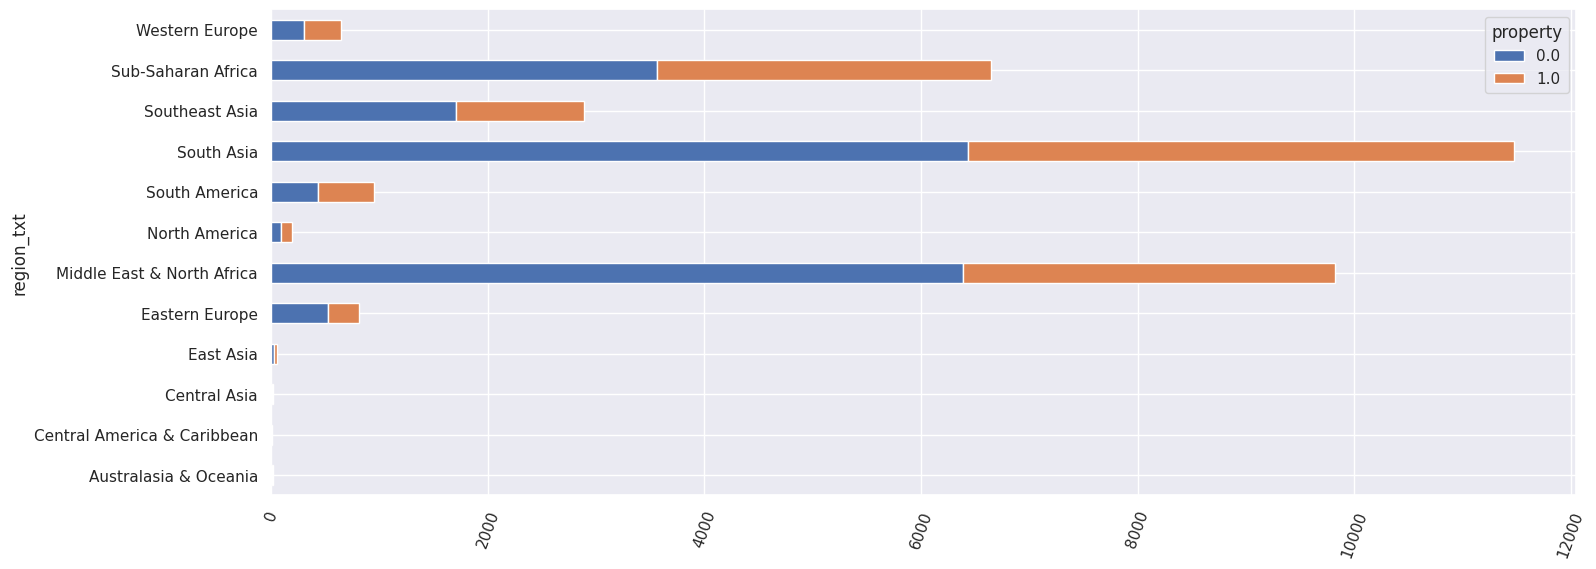

In [21]:
# Region-wise property damage
pdmg_region = pd.crosstab(yr.region_txt,yr.property)
pdmg_region

pr = pdmg_region.plot.barh(stacked=True)
plt.xticks(rotation=70)

fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

# plt.title('Property Damage due to different attack types')
pl.legend(title='Property Damage by Region', bbox_to_anchor=(1, 1.02))

##Exploring terrorism in India


In [22]:
ind = df[df['country_txt']=='India']
print('Most prominent type of attack:',ind['attacktype1_txt'].value_counts().index[0])
print('Top 5 gangs in India:')
print(ind['gname'].value_counts()[:5])
print(" ")
print('Top 5 targets within the country:')
print(ind['targtype1_txt'].value_counts()[:5])
print(" ")
print('Top 5 attack types in the country:')
print(ind['attacktype1_txt'].value_counts()[:5])

Most prominent type of attack: Bombing/Explosion
Top 5 gangs in India:
Communist Party of India - Maoist (CPI-Maoist)    1619
Maoists                                           1118
Sikh Extremists                                    591
United Liberation Front of Assam (ULFA)            307
Hizbul Mujahideen (HM)                             192
Name: gname, dtype: int64
 
Top 5 targets within the country:
Private Citizens & Property    1683
Police                         1487
Government (General)            856
Business                        724
Military                        530
Name: targtype1_txt, dtype: int64
 
Top 5 attack types in the country:
Bombing/Explosion                 2252
Armed Assault                     2169
Hostage Taking (Kidnapping)        687
Facility/Infrastructure Attack     619
Assassination                      560
Name: attacktype1_txt, dtype: int64


Text(0.5, 1.0, 'Cities with most number of kills in India and the groups responsible')

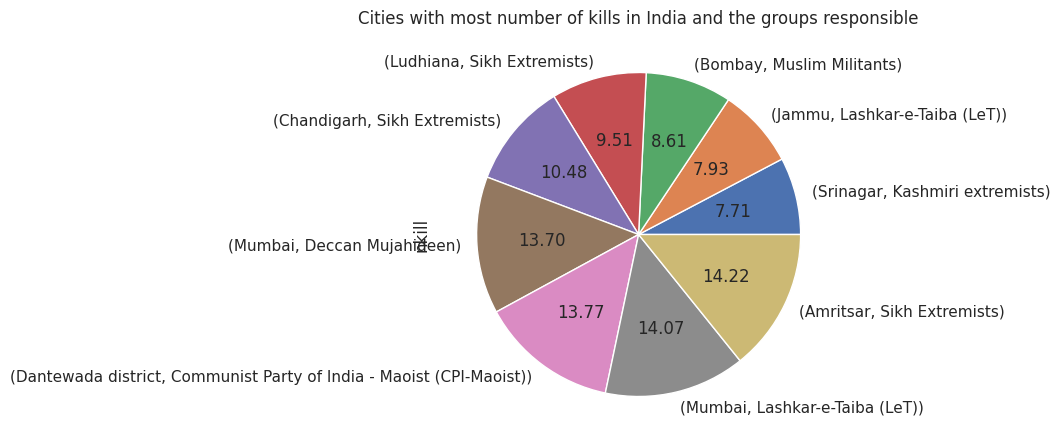

In [30]:
#Most attacked cities with more no of kills and group that attacked in india
df_india=df[df['country_txt']=='India']
df_india = df_india[df_india['city'] !='Unknown']

ind_gp = df_india.groupby(['city','gname']).agg({'nkill':'sum'}).sort_values(by=['nkill'],ascending=True)
ind_gp1=ind_gp[ind_gp['nkill']>100]
ind_gp1.plot.pie(y='nkill',autopct="%.2f",figsize=(5,5),legend=False);
plt.title('Cities with most number of kills in India and the groups responsible')

In [23]:
yr = df[df['iyear'] >= 2010]
top = pd.DataFrame(yr['country_txt'].value_counts().head(25).index.tolist())
free = pd.DataFrame(yr['country_txt'].value_counts().tail(20).index.tolist())

In [24]:
ind = df[df['country_txt'] == 'India']
ind2 = ind[(ind['iyear'] >= 2010)]
top = pd.DataFrame(ind2['gname'].value_counts().head(20).index.tolist())

There are 700 words in the combination of all cells in column imonth.


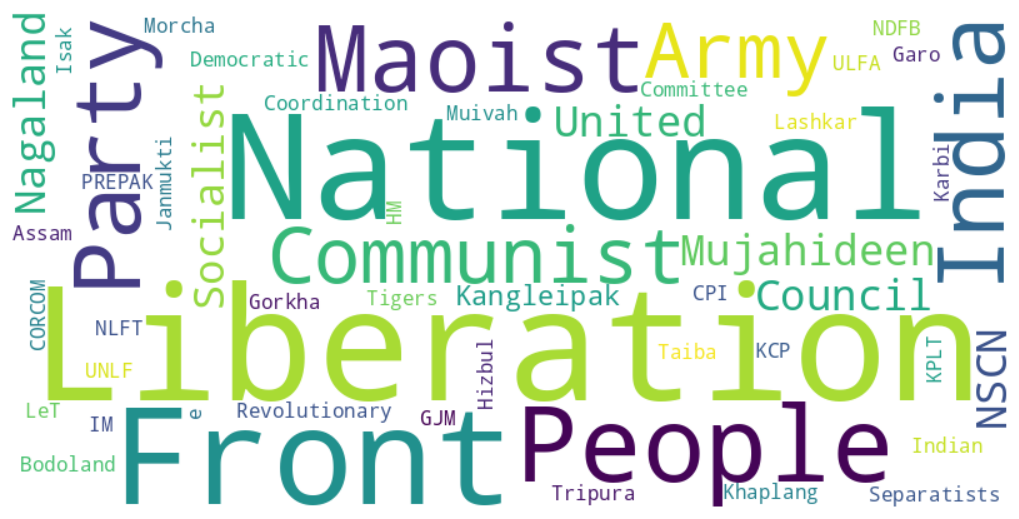

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image

text = " ".join(value for value in top[0].values.astype(str))
print ("There are {} words in the combination of all cells in column imonth.".format(len(text)))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.axis("off")
fig=plt.gcf()
fig.set_size_inches(15,5)

plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## Overall Analysis

<Axes: xlabel='iyear'>

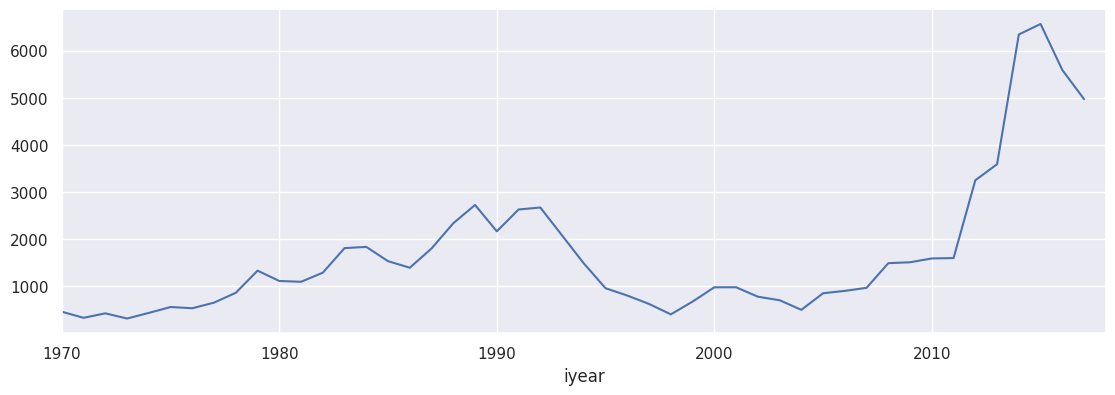

In [31]:
# Trend in terrorist attacks over the years
year_wise = df.groupby('iyear').size()
plt.subplots(figsize=(12,4))
plt.xlim([1970, 2018])
year_wise.plot()

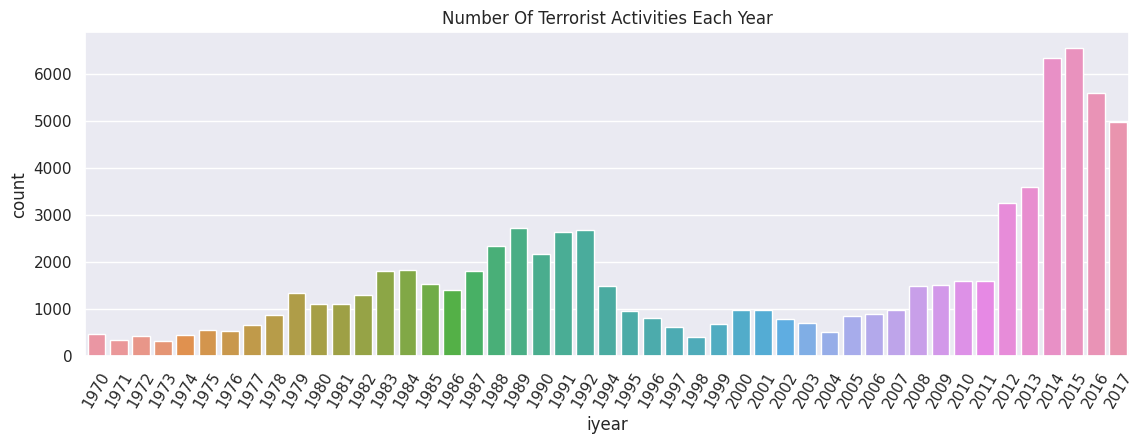

In [32]:
# What is the change in number of terrorist activities over the years?
plt.subplots(figsize=(12,4))
sns.countplot(x = 'iyear', data = df)
plt.xticks(rotation=60)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Text(0.5, 1.0, 'Gang responsible for most number of kils and wounds')

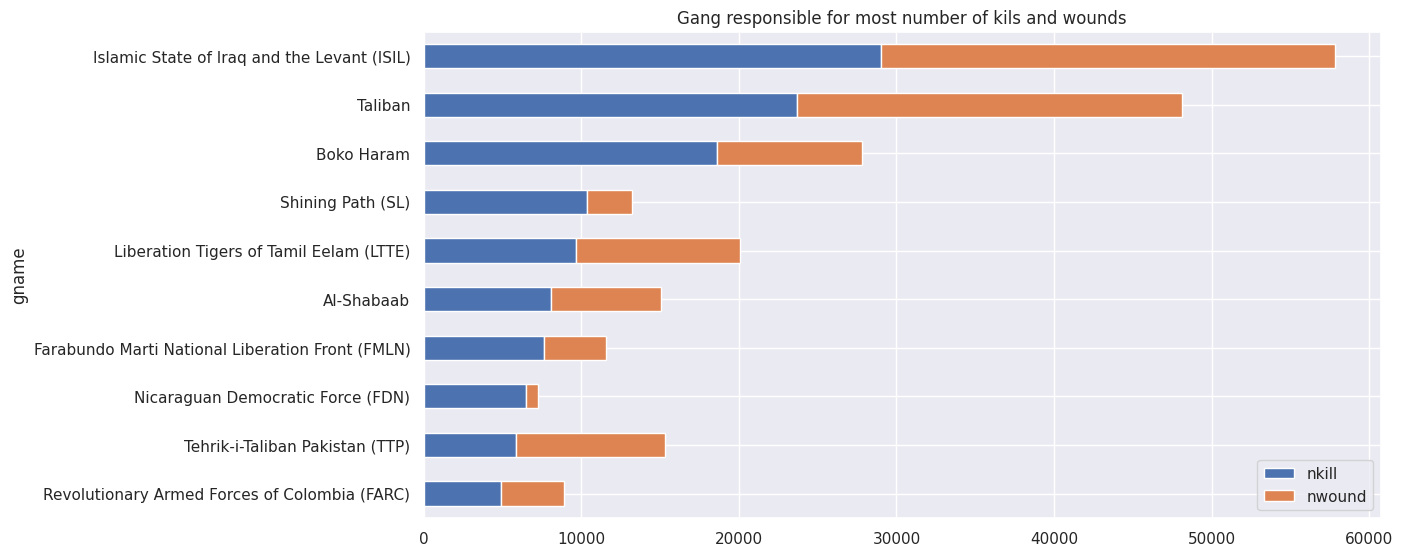

In [33]:
# gangs with most number of kills and wounded
gangs = df[df['gname'] != 'Unknown']
l = gangs.groupby('gname').agg({'nkill':'sum','nwound':'sum'}).sort_values(by=['nkill'],ascending=True)
lkill_wound=l[(l['nkill']>=4500)]
lkill_wound.plot.barh(stacked=True)
plt.title('Gang responsible for most number of kils and wounds')

Text(0.5, 1.0, 'Most active gangs from 1970 to 2009')

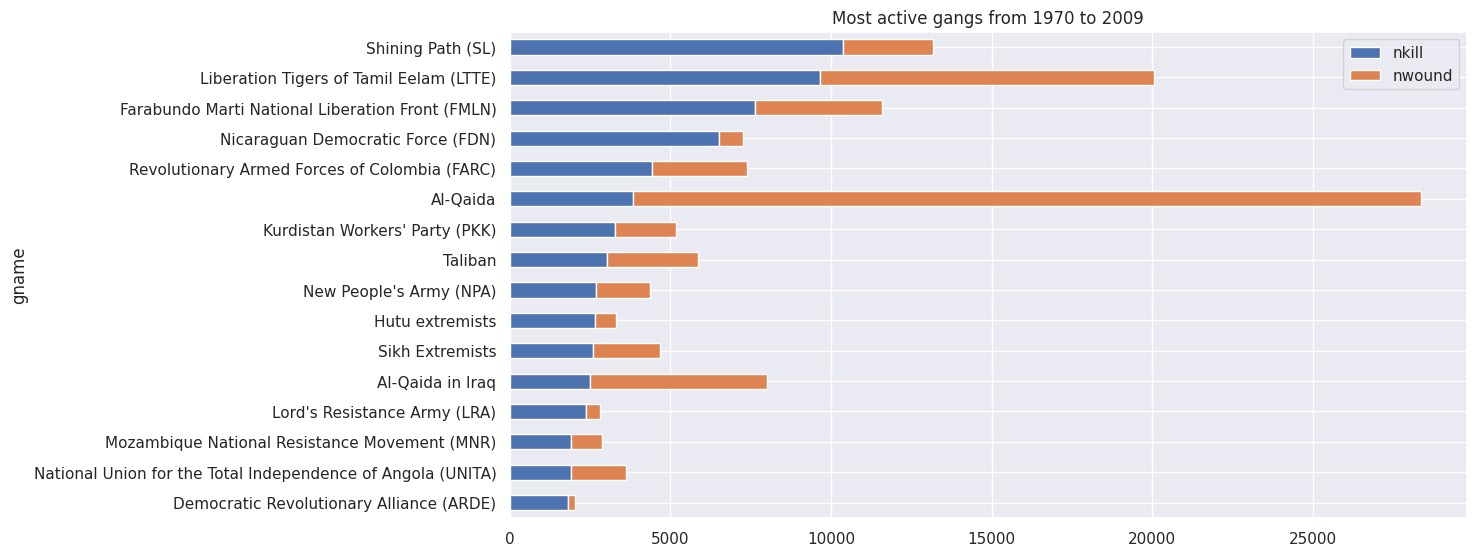

In [34]:
#The most active gang in kills and wounds from 1970 to 2009
gangs_b_2000 = gangs[gangs['iyear']<= 2009]
kw_past = gangs_b_2000.groupby('gname').agg({'nkill':'sum','nwound':'sum'}).sort_values(by=['nkill'],ascending=True)
kwp_kill_wound=kw_past[(kw_past['nkill']>=1800)]
kwp_kill_wound.plot.barh(stacked=True)
plt.title('Most active gangs from 1970 to 2009')

Text(0.5, 1.0, 'Gangs and their most prefered target and weapons')

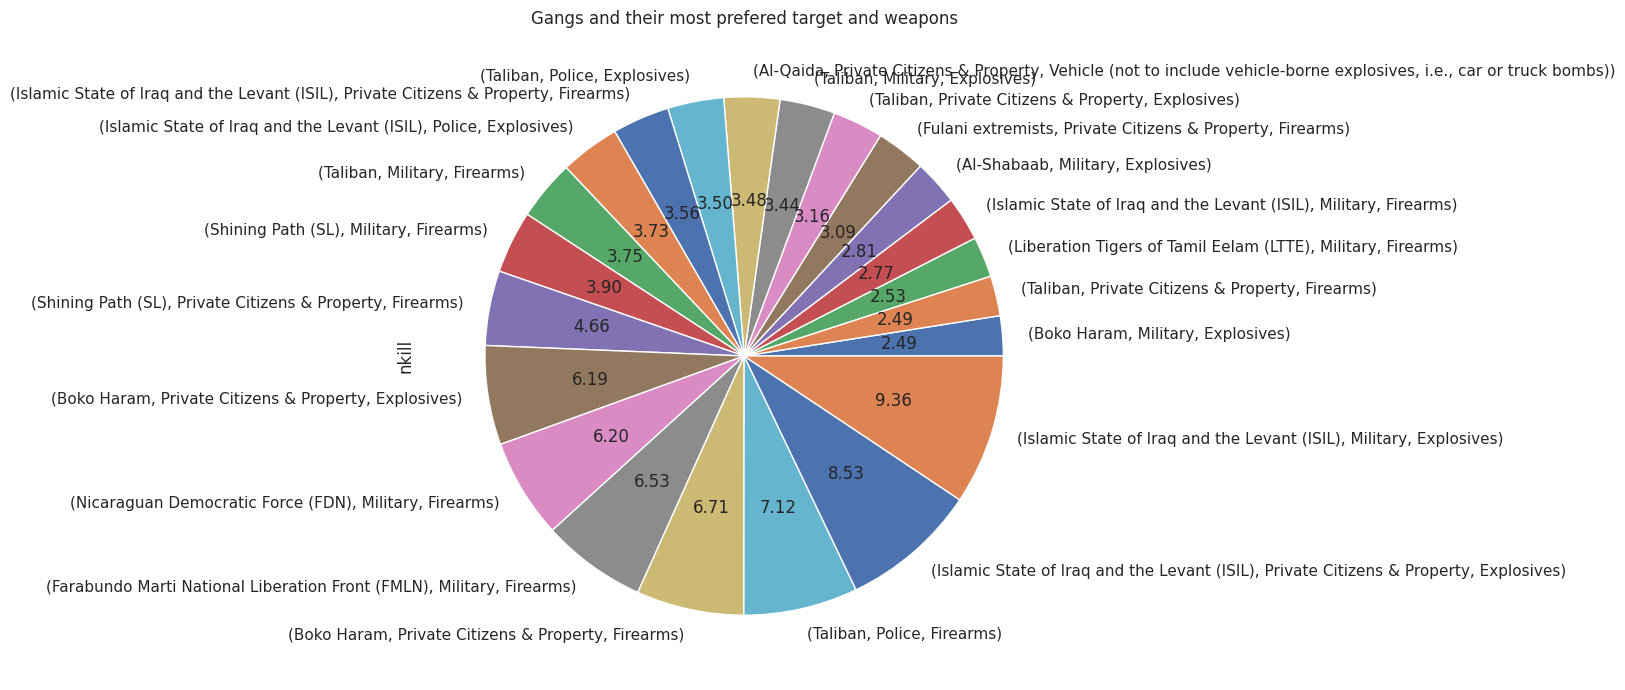

In [47]:
# Weapons used by gangs in attacks with more than 2000 kills
name_targ_weap = df[df['gname']!='Unknown'].groupby(['gname','targtype1_txt','weaptype1_txt']).agg({'nkill':'sum'}).sort_values(by=['nkill'],ascending=True)
name_targ_weap1 = name_targ_weap[name_targ_weap['nkill']>2000]
name_targ_weap1.plot.pie(y='nkill',autopct="%.2f",figsize=(12,# visualizing weapons with respect to attack types
attacktype_weapontype_table = pd.crosstab(index= df["attacktype1_txt"], columns=df["weaptype1_txt"])
attacktype_weapontype_table

attacktype_weapontype_table.plot(kind="bar",figsize=(10,10),stacked=True)8),legend=False);
plt.title('Gangs and their most prefered target and weapons')

<Axes: xlabel='attacktype1_txt'>

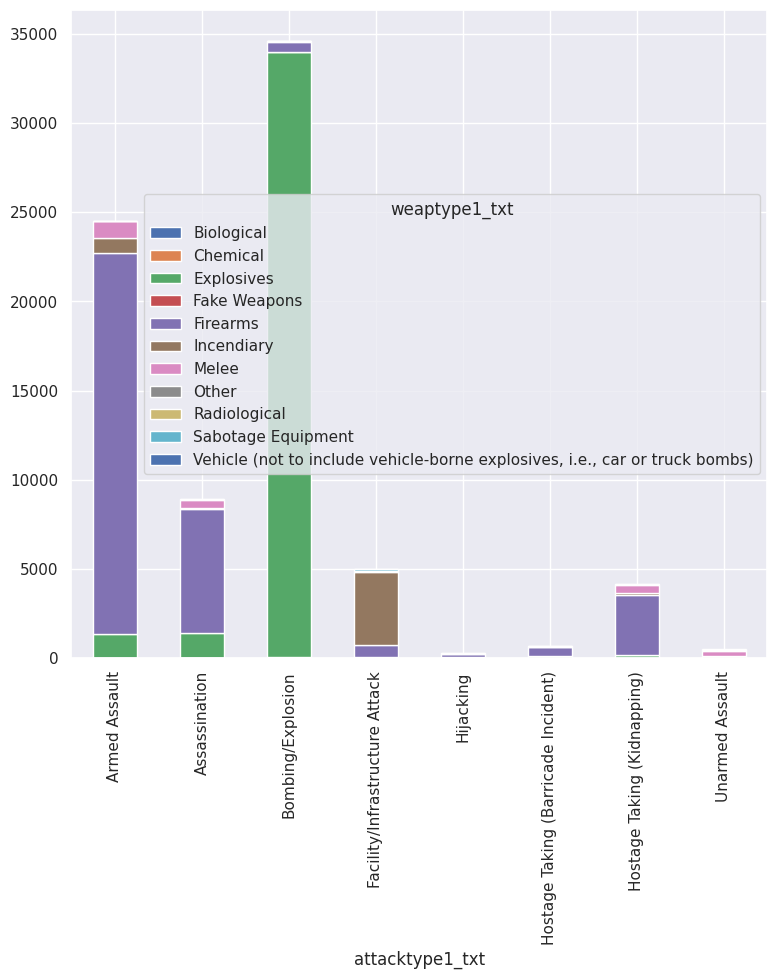

In [52]:
# visualizing weapons with respect to attack types
attacktype_weapontype_table = pd.crosstab(index= df["attacktype1_txt"], columns=df["weaptype1_txt"])
attacktype_weapontype_table

attacktype_weapontype_table.plot(kind="bar",figsize=(8,8),stacked=True)

Text(0, 0.5, 'Weapon Type')

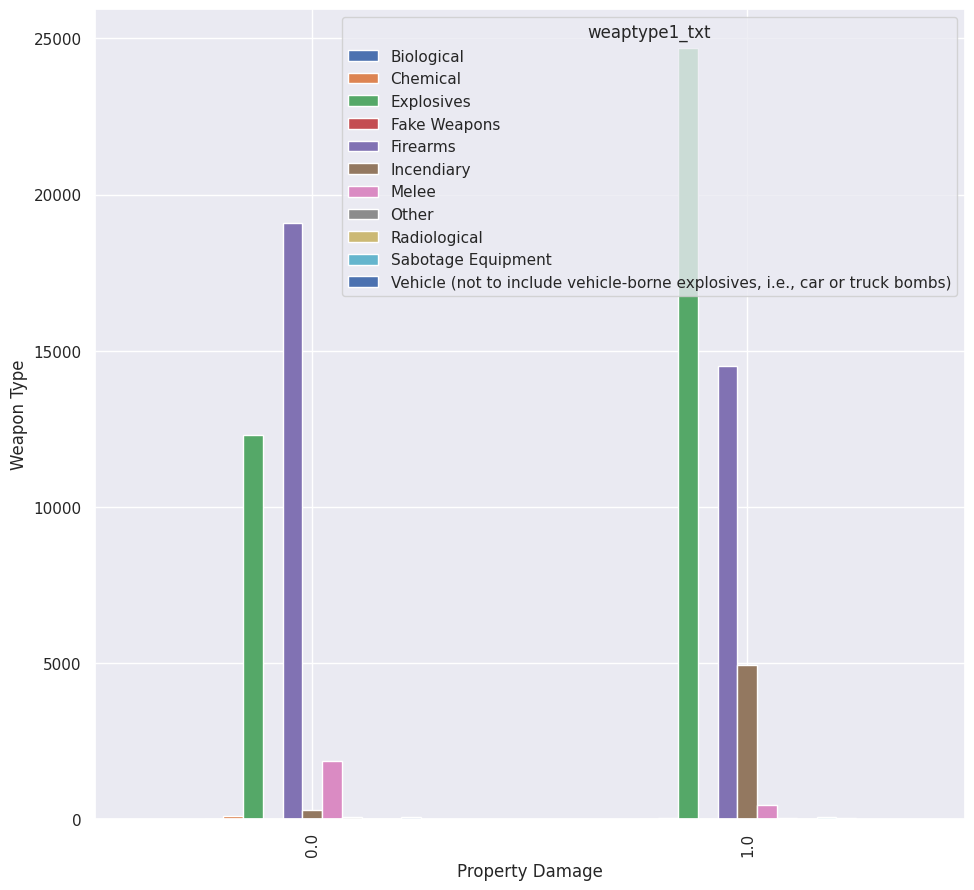

In [53]:
#visualizing property damage with respect to weapon type
property_attacktype_table = pd.crosstab(index=df["property"], columns=df["weaptype1_txt"])
property_attacktype_table
property_attacktype_table.plot(kind="bar",figsize=(10,10),stacked=False)
plt.xlabel("Property Damage")
plt.ylabel("Weapon Type")